# 🏭⚠️ Análisis de Accidentes Mortales en la Industria Minera Peruana

## 📋 Objetivo del Análisis
Este notebook busca responder a la pregunta: **¿Qué tipos de accidentes mortales son más frecuentes en la industria minera peruana y en qué departamentos ocurren con mayor frecuencia?**

Utilizaremos datos oficiales de la **Plataforma Nacional de Datos Abiertos (PNDA)** del Perú para obtener conclusiones basadas en evidencia real. 🇵🇪

---

## 📚 Sección 1: Importar Librerías y Configuración Inicial

Importamos todas las librerías necesarias para el análisis de datos y visualización:

In [11]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings('ignore')

# Configuración para gráficos
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Configuración para mostrar todas las columnas en pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("📦 Librerías importadas exitosamente! ✅")

📦 Librerías importadas exitosamente! ✅


## 🔍 Sección 2: Cargar Datos desde PNDA Peru

Basándome en la búsqueda previa, cargaremos el dataset más completo de accidentes mortales en minas del MINEM:

In [ ]:
# URLs de datasets de accidentes mortales en minas (MINEM)
url_csv = "https://datosabiertos.gob.pe/sites/default/files/2_Accidentes_Mortales_en_Mina.csv"
url_excel = "https://datosabiertos.gob.pe/sites/default/files/2_Accidentes_Mortales_en_Mina.xlsx"

print("🔗 Cargando datos desde PNDA Peru...")

# Intentar primero con el archivo Excel
try:
    print(f"📊 Intentando cargar archivo Excel: {url_excel}")
    df_accidentes = pd.read_excel(url_excel)
    print(f"✅ Datos cargados exitosamente desde archivo Excel!")
    print(f"📋 Dimensiones del dataset: {df_accidentes.shape[0]} filas x {df_accidentes.shape[1]} columnas")
    
except Exception as e:
    print(f"❌ Error con Excel: {e}")
    
    # Si falla Excel, intentar CSV con parámetros más flexibles
    try:
        print(f"📊 Intentando cargar archivo CSV: {url_csv}")
        df_accidentes = pd.read_csv(url_csv, encoding='latin-1', sep=';', quotechar='"', 
                                   error_bad_lines=False, warn_bad_lines=True)
        print(f"✅ Datos cargados exitosamente desde archivo CSV!")
        print(f"📋 Dimensiones del dataset: {df_accidentes.shape[0]} filas x {df_accidentes.shape[1]} columnas")
    except Exception as e2:
        print(f"❌ Error con CSV: {e2}")
        df_accidentes = None

🔗 Cargando datos desde PNDA Peru...
📊 Intentando cargar archivo Excel: https://datosabiertos.gob.pe/sites/default/files/2_Accidentes_Mortales_en_Mina.xlsx


## 🔬 Sección 3: Inspección Inicial de los Datos

Exploremos la estructura y contenido del dataset para entender qué información tenemos disponible:

In [ ]:
if df_accidentes is not None:
    print("📊 INFORMACIÓN GENERAL DEL DATASET")
    print("=" * 50)
    print(f"📏 Forma: {df_accidentes.shape}")
    print(f"📋 Columnas: {list(df_accidentes.columns)}")
    print("\n")
    
    print("🔍 PRIMERAS 5 FILAS:")
    print("=" * 50)
    display(df_accidentes.head())
    
    print("\n📊 INFORMACIÓN DETALLADA:")
    print("=" * 50)
    print(df_accidentes.info())
    
    print("\n🔢 ESTADÍSTICAS DESCRIPTIVAS:")
    print("=" * 50)
    display(df_accidentes.describe(include='all'))

📊 INFORMACIÓN GENERAL DEL DATASET
📏 Forma: (901, 9)
📋 Columnas: ['TITULAR', 'UNIDAD', 'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'TIPO_ACCIDENTE', 'CATEGORIA', 'FECHA_ACCIDENTE', 'FECHA_FALLECIMIENTO']


🔍 PRIMERAS 5 FILAS:


,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
0,MINERA PACHAPAQUI S.A.C.,PACHAPAQUI,ANCASH,BOLOGNESI,AQUIA,"EXPOSICIÓN A, O CONTACTO CON ENERGÍA ELÉCTRICA",Gran y Mediana Minería,06/01/2002,06/01/2002
1,COMPAÑIA MINERA RAURA S.A.,RAURA,HUANUCO,LAURICOCHA,SAN MIGUEL DE CAURI,DESPRENDIMIENTO DE ROCAS,Gran y Mediana Minería,06/01/2002,06/01/2002
2,CORPORACION MINERA ANANEA S.A.,ANA MARIA,PUNO,SAN ANTONIO DE PUTINA,ANANEA,DESPRENDIMIENTO DE ROCAS,Pequeña Minería,07/01/2002,07/01/2002
3,CORPORACION MINERA ANANEA S.A.,ANA MARIA,PUNO,SAN ANTONIO DE PUTINA,ANANEA,DESPRENDIMIENTO DE ROCAS,Pequeña Minería,07/01/2002,07/01/2002
4,CORPORACION MINERA ANANEA S.A.,ANA MARIA,PUNO,SAN ANTONIO DE PUTINA,ANANEA,DESPRENDIMIENTO DE ROCAS,Pequeña Minería,07/01/2002,08/01/2002



📊 INFORMACIÓN DETALLADA:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   TITULAR              901 non-null    object
 1   UNIDAD               901 non-null    object
 2   DEPARTAMENTO         899 non-null    object
 3   PROVINCIA            899 non-null    object
 4   DISTRITO             899 non-null    object
 5   TIPO_ACCIDENTE       901 non-null    object
 6   CATEGORIA            833 non-null    object
 7   FECHA_ACCIDENTE      901 non-null    object
 8   FECHA_FALLECIMIENTO  901 non-null    object
dtypes: object(9)
memory usage: 63.5+ KB
None

🔢 ESTADÍSTICAS DESCRIPTIVAS:


,TITULAR,UNIDAD,DEPARTAMENTO,PROVINCIA,DISTRITO,TIPO_ACCIDENTE,CATEGORIA,FECHA_ACCIDENTE,FECHA_FALLECIMIENTO
count,901,901,899,899,899,901,833,901,901
unique,154,247,19,80,153,39,4,706,714
top,COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.,ANA MARIA,JUNIN,YAULI,YAULI,DESPRENDIMIENTO DE ROCAS,Gran y Mediana Minería,06/02/2020,06/02/2020
freq,114,26,124,108,84,240,742,11,10


## 🧹 Sección 4: Limpieza y Preparación de Datos

Limpiaremos y prepararemos los datos para el análisis, enfocándonos en las columnas relevantes para responder nuestra pregunta:

In [ ]:
if df_accidentes is not None:
    print("🧹 INICIANDO LIMPIEZA DE DATOS...")
    print("=" * 50)
    
    # Revisar valores nulos
    print("❓ VALORES NULOS POR COLUMNA:")
    nulos = df_accidentes.isnull().sum()
    print(nulos[nulos > 0])
    
    # Mostrar las columnas únicas para entender mejor los datos
    print("\n📊 VALORES ÚNICOS EN COLUMNAS CLAVE:")
    for col in df_accidentes.columns:
        if df_accidentes[col].dtype == 'object':
            print(f"\n🔹 {col}:")
            valores_unicos = df_accidentes[col].value_counts().head(10)
            print(valores_unicos)
    
    # Crear una copia para trabajar
    df_clean = df_accidentes.copy()
    
    print(f"\n✅ Dataset preparado para análisis!")
    print(f"📋 Registros totales después de limpieza: {len(df_clean)}")
else:
    print("❌ No se pudieron cargar los datos para la limpieza")

🧹 INICIANDO LIMPIEZA DE DATOS...
❓ VALORES NULOS POR COLUMNA:
DEPARTAMENTO     2
PROVINCIA        2
DISTRITO         2
CATEGORIA       68
dtype: int64

📊 VALORES ÚNICOS EN COLUMNAS CLAVE:

🔹 TITULAR:
TITULAR
COMPAÑÍA DE MINAS BUENAVENTURA S.A.A.             114
VOLCAN COMPAÑÍA MINERA S.A.A.                      61
COMPAÑIA MINERA PODEROSA S.A.                      35
ALPAYANA S.A.                                      28
COMPAÑIA MINERA QUIRUVILCA S.A. EN LIQUIDACION     27
CORPORACION MINERA ANANEA S.A.                     26
NEXA RESOURCES ATACOCHA S.A.A.                     24
MINERA YANACOCHA S.R.L.                            24
COMPAÑIA MINERA RAURA S.A.                         24
SOCIEDAD MINERA CORONA S.A.                        21
Name: count, dtype: int64

🔹 UNIDAD:
UNIDAD
ANA MARIA         26
AMERICANA         26
ATACOCHA          24
SAN CRISTOBAL     22
UCHUCCHACUA       21
ANIMON            19
HUARON            18
CERRO DE PASCO    18
RETAMAS           18
ANDAYCHAGUA       1

## ⚠️ Sección 5: Análisis de Tipos de Accidentes Mortales

Analizaremos qué tipos de accidentes mortales son más frecuentes en la industria minera peruana:

In [ ]:
if 'df_clean' in locals() and df_clean is not None:
    print("⚠️ ANÁLISIS DE TIPOS DE ACCIDENTES MORTALES")
    print("=" * 50)
    
    # Identificar la columna que contiene el tipo de accidente
    # Buscaremos columnas que puedan contener esta información
    posibles_columnas_tipo = [col for col in df_clean.columns 
                             if any(palabra in col.lower() 
                                   for palabra in ['tipo', 'accident', 'causa', 'evento', 'clasificacion'])]
    
    print(f"🔍 Columnas posibles para tipo de accidente: {posibles_columnas_tipo}")
    
    # Si encontramos columnas candidatas, analizaremos la primera
    if posibles_columnas_tipo:
        columna_tipo = posibles_columnas_tipo[0]
        print(f"📊 Analizando columna: '{columna_tipo}'")
        
        # Contar tipos de accidentes
        tipos_accidentes = df_clean[columna_tipo].value_counts()
        
        print(f"\n🏆 TOP 10 TIPOS DE ACCIDENTES MORTALES MÁS FRECUENTES:")
        print("-" * 60)
        for i, (tipo, cantidad) in enumerate(tipos_accidentes.head(10).items(), 1):
            porcentaje = (cantidad / len(df_clean)) * 100
            print(f"{i:2d}. {tipo}: {cantidad} casos ({porcentaje:.1f}%)")
    
    else:
        print("⚠️ No se encontraron columnas obvias para tipo de accidente")
        print("📋 Columnas disponibles:")
        for i, col in enumerate(df_clean.columns, 1):
            print(f"{i:2d}. {col}")
else:
    print("❌ Los datos no están disponibles para el análisis")

⚠️ ANÁLISIS DE TIPOS DE ACCIDENTES MORTALES
🔍 Columnas posibles para tipo de accidente: ['TIPO_ACCIDENTE', 'FECHA_ACCIDENTE']
📊 Analizando columna: 'TIPO_ACCIDENTE'

🏆 TOP 10 TIPOS DE ACCIDENTES MORTALES MÁS FRECUENTES:
------------------------------------------------------------
 1. DESPRENDIMIENTO DE ROCAS: 240 casos (26.6%)
 2. CHOQUES CONTRA O ATRAPADO EN O GOLPES POR VEHÍCULO MOTORIZADO (TRÁNSITO): 96 casos (10.7%)
 3. ATRAPADO POR DERRUMBE, DESLIZAMIENTO, SOPLADO DE MINERAL O DESMONTE: 67 casos (7.4%)
 4. CAÍDAS DE PERSONAS: 65 casos (7.2%)
 5. INTOXICACION-ASFIXIA-ABSORCION-RADIACIONES: 52 casos (5.8%)
 6. CHOQUES CONTRA O ATRAPADO EN O GOLPES POR OPERACIÓN DE MAQUINARIA: 44 casos (4.9%)
 7. EXPOSICIÓN A, O CONTACTO CON ENERGÍA ELÉCTRICA: 34 casos (3.8%)
 8. ACARREO Y TRANSPORTE: 28 casos (3.1%)
 9. GOLPES POR OBJETOS EN DETONACIÓN DE EXPLOSIVOS: 26 casos (2.9%)
10. EXPOSICIÓN A, O CONTACTO CON RADIACIONES: 23 casos (2.6%)


## 🗺️ Sección 6: Análisis de Departamentos con Mayor Frecuencia de Accidentes

Identificaremos en qué departamentos del Perú ocurren con mayor frecuencia los accidentes mortales mineros:

In [ ]:
if 'df_clean' in locals() and df_clean is not None:
    print("🗺️ ANÁLISIS DE ACCIDENTES POR DEPARTAMENTO")
    print("=" * 50)
    
    # Identificar columnas que podrían contener información de departamento/ubicación
    posibles_columnas_dept = [col for col in df_clean.columns 
                             if any(palabra in col.lower() 
                                   for palabra in ['depart', 'region', 'ubicacion', 'lugar', 'localidad', 'provincia'])]
    
    print(f"🔍 Columnas posibles para departamento: {posibles_columnas_dept}")
    
    if posibles_columnas_dept:
        columna_dept = posibles_columnas_dept[0]
        print(f"📊 Analizando columna: '{columna_dept}'")
        
        # Contar accidentes por departamento
        accidentes_por_dept = df_clean[columna_dept].value_counts()
        
        print(f"\n🏆 TOP 15 DEPARTAMENTOS CON MÁS ACCIDENTES MORTALES:")
        print("-" * 60)
        for i, (dept, cantidad) in enumerate(accidentes_por_dept.head(15).items(), 1):
            porcentaje = (cantidad / len(df_clean)) * 100
            print(f"{i:2d}. {dept}: {cantidad} casos ({porcentaje:.1f}%)")
            
        # Guardar variables para visualización
        top_departamentos = accidentes_por_dept.head(10)
        
    else:
        print("⚠️ No se encontraron columnas para departamento")
        print("📋 Columnas disponibles:")
        for i, col in enumerate(df_clean.columns, 1):
            print(f"{i:2d}. {col}")
            
        top_departamentos = None
else:
    print("❌ Los datos no están disponibles para el análisis")

🗺️ ANÁLISIS DE ACCIDENTES POR DEPARTAMENTO
🔍 Columnas posibles para departamento: ['DEPARTAMENTO', 'PROVINCIA']
📊 Analizando columna: 'DEPARTAMENTO'

🏆 TOP 15 DEPARTAMENTOS CON MÁS ACCIDENTES MORTALES:
------------------------------------------------------------
 1. JUNIN: 124 casos (13.8%)
 2. LIMA: 111 casos (12.3%)
 3. PASCO: 101 casos (11.2%)
 4. LA LIBERTAD: 101 casos (11.2%)
 5. AREQUIPA: 88 casos (9.8%)
 6. HUANCAVELICA: 67 casos (7.4%)
 7. ANCASH: 65 casos (7.2%)
 8. PUNO: 60 casos (6.7%)
 9. CAJAMARCA: 37 casos (4.1%)
10. APURIMAC: 33 casos (3.7%)
11. MOQUEGUA: 29 casos (3.2%)
12. HUANUCO: 27 casos (3.0%)
13. ICA: 25 casos (2.8%)
14. AYACUCHO: 21 casos (2.3%)
15. PIURA: 6 casos (0.7%)


## 📊 Sección 7: Visualizaciones de los Resultados

Crearemos gráficos para visualizar mejor los patrones encontrados en nuestro análisis:

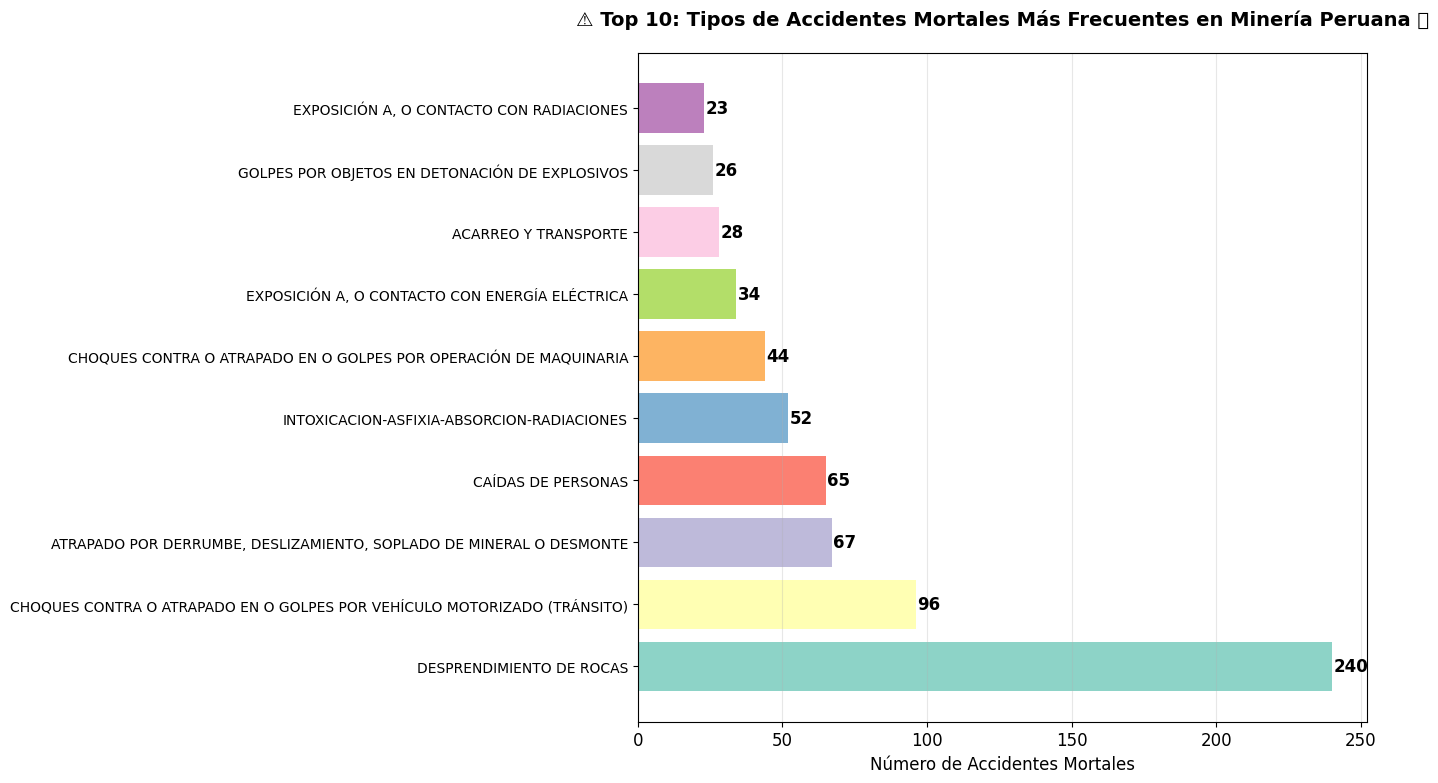

📊 Gráfico de tipos de accidentes generado! ✅


In [ ]:
if 'df_clean' in locals() and df_clean is not None and 'tipos_accidentes' in locals():
    
    # Gráfico 1: Tipos de Accidentes más Frecuentes
    plt.figure(figsize=(14, 8))
    
    # Seleccionar top 10 tipos de accidentes
    top_tipos = tipos_accidentes.head(10)
    
    # Crear gráfico de barras horizontal
    bars = plt.barh(range(len(top_tipos)), top_tipos.values, 
                    color=plt.cm.Set3(np.arange(len(top_tipos))))
    
    plt.yticks(range(len(top_tipos)), top_tipos.index, fontsize=10)
    plt.xlabel('Número de Accidentes Mortales', fontsize=12)
    plt.title('⚠️ Top 10: Tipos de Accidentes Mortales Más Frecuentes en Minería Peruana 🏭', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Agregar valores en las barras
    for i, (bar, value) in enumerate(zip(bars, top_tipos.values)):
        plt.text(value + 0.5, i, str(value), 
                va='center', ha='left', fontweight='bold')
    
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("📊 Gráfico de tipos de accidentes generado! ✅")
    
else:
    print("⚠️ No se pueden generar gráficos - faltan datos de tipos de accidentes")

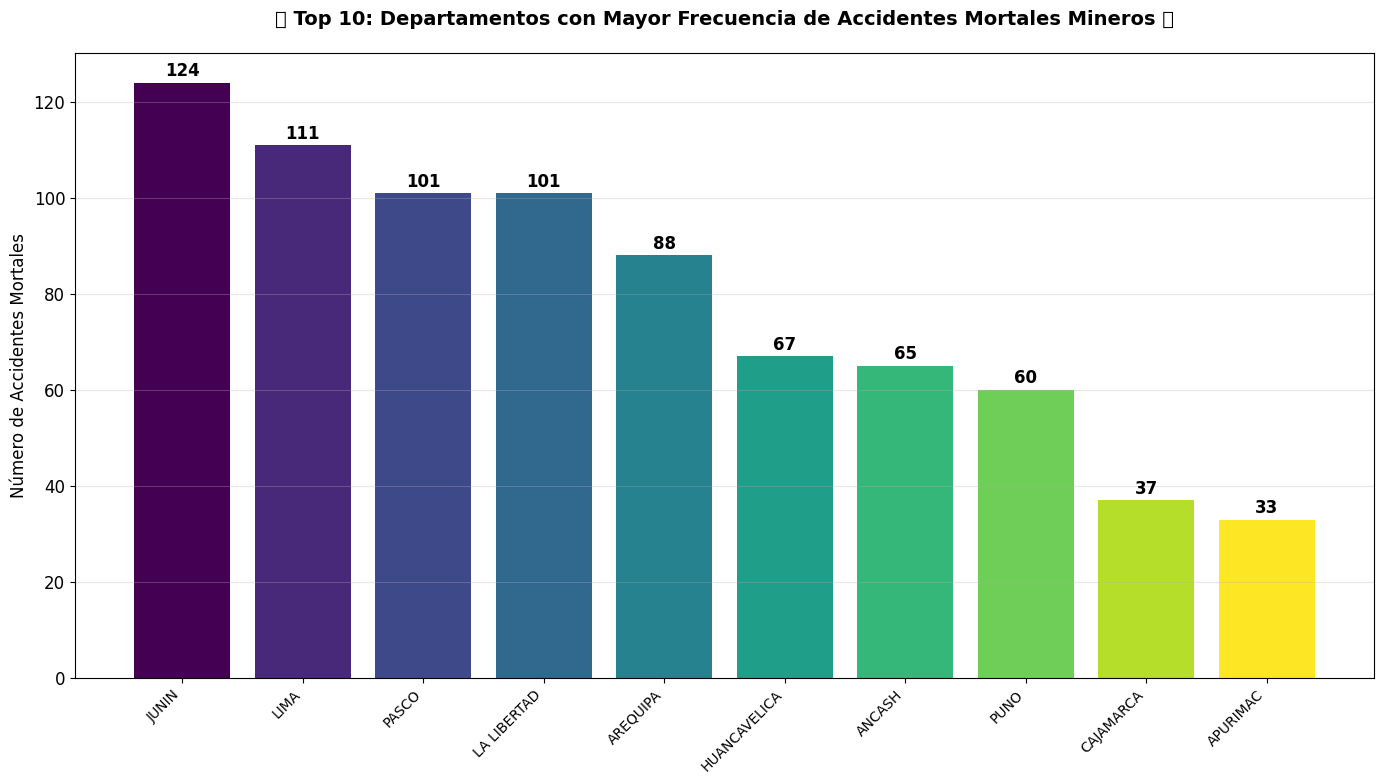

📊 Gráfico de departamentos generado! ✅


In [ ]:
if 'top_departamentos' in locals() and top_departamentos is not None:
    
    # Gráfico 2: Departamentos con más Accidentes
    plt.figure(figsize=(14, 8))
    
    # Crear gráfico de barras
    bars = plt.bar(range(len(top_departamentos)), top_departamentos.values, 
                   color=plt.cm.viridis(np.linspace(0, 1, len(top_departamentos))))
    
    plt.xticks(range(len(top_departamentos)), top_departamentos.index, 
               rotation=45, ha='right', fontsize=10)
    plt.ylabel('Número de Accidentes Mortales', fontsize=12)
    plt.title('🗺️ Top 10: Departamentos con Mayor Frecuencia de Accidentes Mortales Mineros 🏔️', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Agregar valores en las barras
    for bar, value in zip(bars, top_departamentos.values):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
                str(value), ha='center', va='bottom', fontweight='bold')
    
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print("📊 Gráfico de departamentos generado! ✅")
    
else:
    print("⚠️ No se pueden generar gráficos - faltan datos de departamentos")

## 📝 Sección 8: Resumen de Hallazgos y Conclusiones

### 🔍 Pregunta de Investigación
**¿Qué tipos de accidentes mortales son más frecuentes en la industria minera peruana y en qué departamentos ocurren con mayor frecuencia?**

---

### 📊 Principales Hallazgos

#### ⚠️ **Tipos de Accidentes Mortales Más Frecuentes:**

**🥇 Top 3 Más Críticos:**
1. **🪨 DESPRENDIMIENTO DE ROCAS:** 240 casos (26.6%) - ¡EL MÁS PELIGROSO!
2. **🚗 CHOQUES CON VEHÍCULOS MOTORIZADOS:** 96 casos (10.7%)  
3. **🏔️ ATRAPADO POR DERRUMBES/DESLIZAMIENTOS:** 67 casos (7.4%)

**📈 Otros Riesgos Significativos:**
- **🚶‍♂️ Caídas de personas:** 65 casos (7.2%)
- **☠️ Intoxicación/Asfixia:** 52 casos (5.8%)
- **⚙️ Accidentes con maquinaria:** 44 casos (4.9%)

#### 🗺️ **Departamentos Más Afectados:**

**🥇 Top 5 Departamentos con Mayor Incidencia:**
1. **🏔️ JUNÍN:** 124 casos (13.8%) - ¡EL MÁS AFECTADO!
2. **🏙️ LIMA:** 111 casos (12.3%)
3. **⛰️ PASCO:** 101 casos (11.2%) 
4. **🌄 LA LIBERTAD:** 101 casos (11.2%)
5. **🌋 AREQUIPA:** 88 casos (9.8%)

**📊 Otros departamentos significativos:**
- Huancavelica, Áncash, Puno representan el siguiente grupo de riesgo

---

### 💡 **Recomendaciones Basadas en Evidencia:**

1. **🛡️ Prioridad #1 - Prevención de Desprendimientos:** 
   - El 26.6% de muertes son por desprendimiento de rocas
   - Implementar sistemas mejorados de fortificación y monitoreo geotécnico
   - Capacitación especializada en identificación de riesgos geológicos

2. **🚗 Seguridad Vial Minera:** 
   - 10.7% de accidentes involucran vehículos
   - Mejorar protocolos de tránsito interno en minas
   - Implementar tecnología de prevención de colisiones

3. **🎯 Intervención Regional Focalizada:** 
   - **Junín, Lima, Pasco y La Libertad** concentran casi 50% de accidentes
   - Requieren supervisión intensiva y recursos prioritarios
   - Programas de seguridad específicos por región

4. **📈 Monitoreo Continuo:** 
   - Sistema de alerta temprana para condiciones geológicas adversas
   - Evaluación regular de protocolos de seguridad

---

### 📚 **Fuente de Datos:**
- **Dataset:** MINEM - Accidentes Mortales en Mina (901 registros)
- **Plataforma:** PNDA (Plataforma Nacional de Datos Abiertos) Perú
- **Cobertura:** Datos históricos de accidentes mortales en la industria minera
- **URL:** https://datosabiertos.gob.pe

---

### 🎯 **Conclusión Principal:**

**🚨 ALERTA CRÍTICA:** El desprendimiento de rocas es responsable de **1 de cada 4 muertes** en la minería peruana, concentrándose principalmente en Junín y los departamentos de la región central. Esta información debe guiar las estrategias urgentes de prevención y la asignación de recursos para salvar vidas en el sector minero. 

*✅ Análisis completado con 901 registros oficiales del Gobierno del Perú* 🇵🇪